### The Data Source

Dr Semmelweis published his research in 1861. An [English translation text can be found here](http://graphics8.nytimes.com/images/blogs/freakonomics/pdf/the%20etiology,%20concept%20and%20prophylaxis%20of%20childbed%20fever.pdf).


### Import Statements

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy import stats

### Notebook Presentation

In [2]:
pd.options.display.float_format = "{:,.2f}".format

# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter("%Y")


from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

### Read the Data

In [3]:
df_yearly = pd.read_csv("annual_deaths_by_clinic.csv")
# parse_dates avoids DateTime conversion later
df_monthly = pd.read_csv("monthly_deaths.csv", parse_dates=["date"])

# Preliminary Data Exploration

**Questions**. 
* What is the shape of df_yearly and df_monthly? How many rows and columns?
* What are the column names?
* Which years are included in the dataset?
* Are there any NaN values or duplicates?
* What were the average number of births that took place per month?
* What were the average number of deaths that took place per month?

In [4]:
display(df_yearly)
display(df_monthly)

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2
...,...,...,...
93,1848-11-01,310,9
94,1848-12-01,373,5
95,1849-01-01,403,9
96,1849-02-01,389,12


In [5]:
display(df_yearly.shape)
display(df_monthly.shape)

(12, 4)

(98, 3)

In [6]:
display(df_yearly["year"])
display(df_monthly["date"].dt.year)

0     1841
1     1842
2     1843
3     1844
4     1845
5     1846
6     1841
7     1842
8     1843
9     1844
10    1845
11    1846
Name: year, dtype: int64

0     1841
1     1841
2     1841
3     1841
4     1841
      ... 
93    1848
94    1848
95    1849
96    1849
97    1849
Name: date, Length: 98, dtype: int32

### Check for Nan Values and Duplicates

### Nan Values Check

In [7]:
# Using .info()
display(df_yearly.info())
# 12 entries, 12 non-null.

display(df_monthly.info())
# 98/98 non-null.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 516.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    98 non-null     datetime64[ns]
 1   births  98 non-null     int64         
 2   deaths  98 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.4 KB


None

In [8]:
# Alternatively:
display(df_yearly.isna().sum())
display(df_monthly.isna().sum())

year      0
births    0
deaths    0
clinic    0
dtype: int64

date      0
births    0
deaths    0
dtype: int64

### Duplicates Check

In [9]:
# Count the number of duplicates in the datasets
display(df_yearly.duplicated().sum())
display(df_monthly.duplicated().sum())

0

0

### Descriptive Statistics

Let us see an overview of some stats about the yearly data.

In [10]:
df_yearly.describe()

,year,births,deaths
count,12.00,12.00,12.00
mean,"1,843.50","3,152.75",223.33
std,1.78,449.08,145.38
min,"1,841.00","2,442.00",66.00
25%,"1,842.00","2,901.75",100.25
50%,"1,843.50","3,108.50",219.50
75%,"1,845.00","3,338.25",263.50
max,"1,846.00","4,010.00",518.00


### Percentage of Women Dying in Childbirth

**Q**: How dangerous was childbirth in the 1840s in Vienna? 

* Using the annual data, calculate the percentage of women giving birth who died throughout the 1840s at the hospital.


In comparison, the United States recorded 18.5 maternal deaths per 100,000 or 0.018% in 2013 [(source).](
https://en.wikipedia.org/wiki/Maternal_death#:~:text=The%20US%20has%20the%20%22highest,17.8%20per%20100%2C000%20in%202009)

In [11]:
death_percent = df_yearly["deaths"].sum() / df_yearly["births"].sum()
death_percent = death_percent * 100
print(f"{death_percent:.2f}%")

7.08%


# Visualizing the Total Number of Births and Deaths over Time

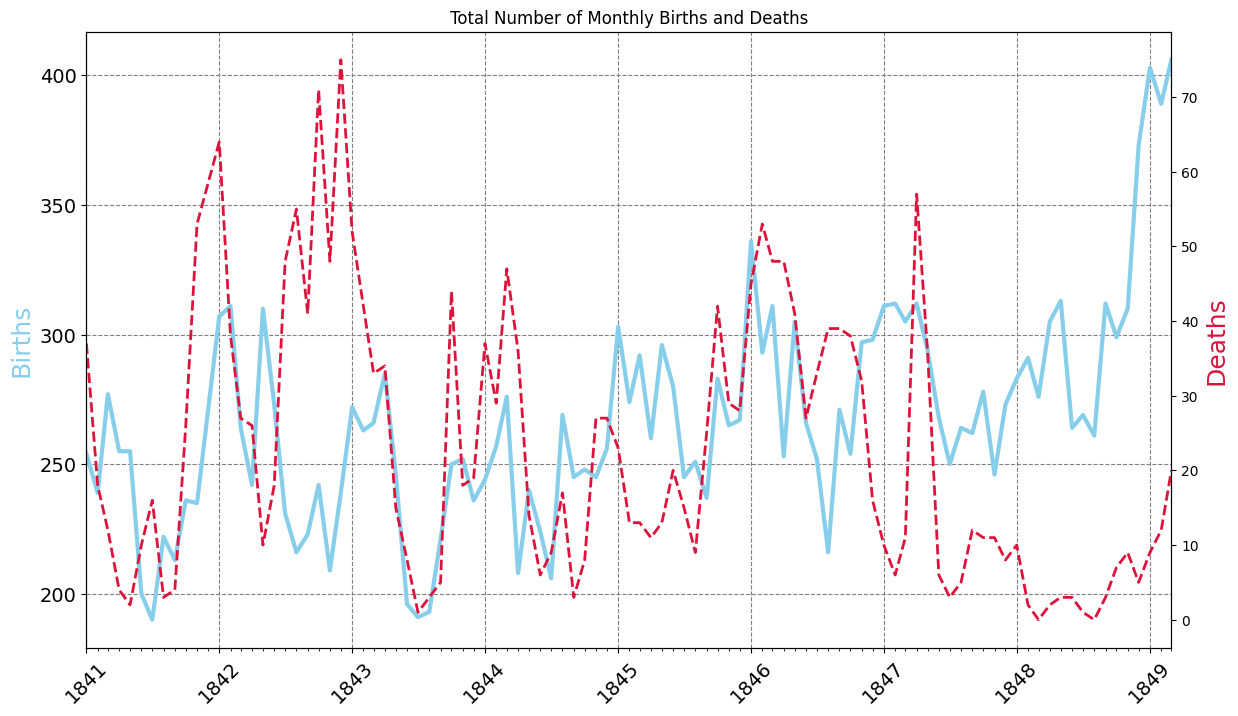

In [12]:
plt.figure(figsize=(14, 8))
plt.title("Total Number of Monthly Births and Deaths")
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

ax1 = plt.gca()
ax2 = ax1.twinx()

# Format the x-axis using locators for the years and months (Hint: we did this in the Google Trends notebook)
ax1.xaxis.set_minor_locator(months)

# Set the range on the x-axis so that the chart lines touch the y-axes
ax1.set_xlim([df_monthly["date"].min(), df_monthly["date"].max()])

# Add gridlines
ax1.grid(color="grey", linestyle="--")

ax1.set_ylabel("Births", color="skyblue", fontsize=18)
ax2.set_ylabel("Deaths", color="crimson", fontsize=18)

# Use `skyblue` and `crimson` for the line colours
# Change the line thickness to 3 and 2 for the births and deaths respectively.
ax1.plot(
    df_monthly["date"],
    df_monthly["births"],
    color="skyblue",
    linewidth=3,
)

# Use a dashed line style for the number of deaths
ax2.plot(
    df_monthly["date"],
    df_monthly["deaths"],
    color="crimson",
    linestyle="--",
    linewidth=2,
)

plt.show()

# The Yearly Data Split by Clinic

Now let's look at the annual data instead. 

**Q**: Create line charts of the births and deaths of the two different clinics at the Vienna General Hospital. 
* Which clinic is bigger or more busy judging by the number of births?
* Has the hospital had more patients over time? 
* What was the highest number of deaths recorded in clinic 1 and clinic 2?

In [13]:
births_line = px.line(
    df_yearly,
    x="year",
    y="births",
    color="clinic",
    title="Total Yearly Births by Clinic",
)

births_line.show()

In [14]:
deaths_line = px.line(
    df_yearly,
    x="year",
    y="deaths",
    color="clinic",
    title="Total Yearly Deaths by Clinic",
)

deaths_line.show()

### Calculate the Proportion of Deaths at Each Clinic

**Q**: Calculate the proportion of maternal deaths per clinic. That way we can compare like with like. 
* Work out the percentage of deaths for each row in the `df_yearly` DataFrame by adding a column called "pct_deaths". 
* Calculate the average maternal death rate for clinic 1 and clinic 2 (i.e., the total number of deaths per the total number of births).
* Create another plotly line chart to see how the percentage varies year over year with the two different clinics.
* Which clinic has a higher proportion of deaths?
* What is the highest monthly death rate in clinic 1 compared to clinic 2?

In [15]:
df_yearly["pct_deaths"] = df_yearly["deaths"] / df_yearly["births"]
df_yearly.head()

,year,births,deaths,clinic,pct_deaths
0,1841,3036,237,clinic 1,0.08
1,1842,3287,518,clinic 1,0.16
2,1843,3060,274,clinic 1,0.09
3,1844,3157,260,clinic 1,0.08
4,1845,3492,241,clinic 1,0.07


In [16]:
filt = df_yearly["clinic"] == "clinic 1"
clinic_1 = df_yearly.loc[filt]

total_deaths_1 = clinic_1["deaths"].sum()
total_births_1 = clinic_1["births"].sum()

avg_c2 = (total_deaths_1 / total_births_1) * 100
print(f"Clinic 1 average deaths: {avg_c2:.2f}%.")

Clinic 1 average deaths: 9.92%.


In [17]:
filt = df_yearly["clinic"] == "clinic 2"
clinic_2 = df_yearly.loc[filt]

total_deaths_2 = clinic_2["deaths"].sum()
total_births_2 = clinic_2["births"].sum()

avg_c2 = (total_deaths_2 / total_births_2) * 100
print(f"Clinic 2 average deaths: {avg_c2:.2f}%.")

Clinic 2 average deaths: 3.88%.


### Plotting the Proportion of Yearly Deaths by Clinic

In [18]:
line = px.line(
    df_yearly,
    x="year",
    y="pct_deaths",
    color="clinic",
    title="Proportion of Yearly Deaths by Clinic",
)

line.show()

# The Effect of Handwashing

Dr Semmelweis made handwashing obligatory in the summer of 1947. In fact, he ordered people to wash their hands with clorine (instead of water).

In [19]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime("1847-06-01")

**Q**: 
* Add a column called "pct_deaths" to `df_monthly` that has the percentage of deaths per birth for each row. 
* Create two subsets from the `df_monthly` data: before and after Dr Semmelweis ordered washing hand.
* Calculate the average death rate prior to June 1947.
* Calculate the average death rate after June 1947.

In [20]:
df_monthly["pct_deaths"] = df_monthly["deaths"] / df_monthly["births"]
df_monthly.head(3)

,date,births,deaths,pct_deaths
0,1841-01-01,254,37,0.15
1,1841-02-01,239,18,0.08
2,1841-03-01,277,12,0.04


In [21]:
before_washing = df_monthly[df_monthly["date"] < handwashing_start]
after_washing = df_monthly[df_monthly["date"] >= handwashing_start]

display(before_washing.head(2))
display(after_washing.head(2))

,date,births,deaths,pct_deaths
0,1841-01-01,254,37,0.15
1,1841-02-01,239,18,0.08


,date,births,deaths,pct_deaths
76,1847-06-01,268,6,0.02
77,1847-07-01,250,3,0.01


In [22]:
deaths_total_before = before_washing["deaths"].sum()
births_total_before = before_washing["births"].sum()
death_rate_before = (deaths_total_before / births_total_before) * 100
print(f"Death rate before 1847: {death_rate_before:.2f}%")

Death rate before 1847: 10.53%


In [23]:
deaths_total_after = after_washing["deaths"].sum()
births_total_after = after_washing["births"].sum()
death_rate_after = (deaths_total_after / births_total_after) * 100
print(f"Death rate after 1847: {death_rate_after:.2f}%")

Death rate after 1847: 2.15%


### Calculate a Rolling Average of the Death Rate

**Q**: Create a DataFrame that has the 6 month rolling average death rate prior to mandatory handwashing.

In [24]:
roll_df_before = before_washing.set_index("date")
roll_df_before = roll_df_before.rolling(window=6).mean()
roll_df_before

,births,deaths,pct_deaths
date,,,
1841-01-01,NaN,NaN,NaN
1841-02-01,NaN,NaN,NaN
1841-03-01,NaN,NaN,NaN
1841-04-01,NaN,NaN,NaN
1841-05-01,NaN,NaN,NaN
...,...,...,...
1847-01-01,274.50,29.00,0.11
1847-02-01,290.50,23.50,0.08
1847-03-01,296.17,18.83,0.07


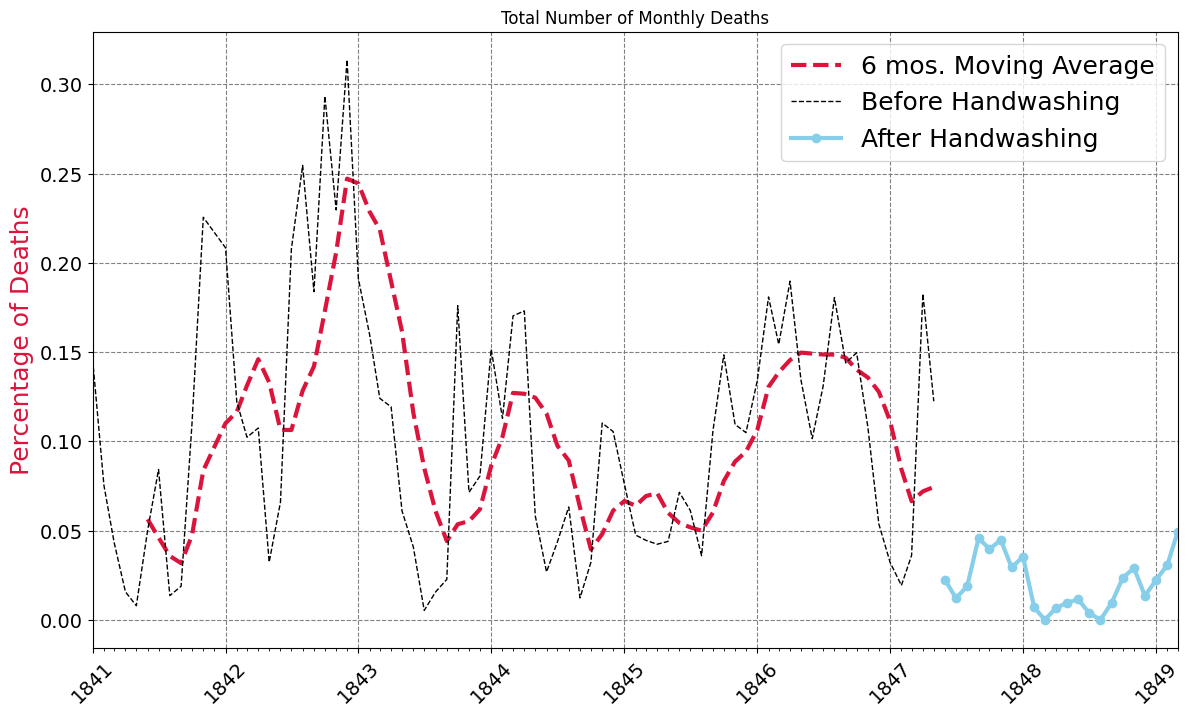

In [25]:
plt.figure(figsize=(14, 8))
plt.title("Total Number of Monthly Deaths")
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

plt.grid(color="grey", linestyle="--")
plt.ylabel("Percentage of Deaths", color="crimson", fontsize=18)


ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)
ax.set_xlim([df_monthly.date.min(), df_monthly.date.max()])

ax1.plot(
    df_monthly["date"],
    df_monthly["births"],
    color="skyblue",
    linewidth=3,
)

# The comma after the variable is just unpacking the return value of plt.plot
# since it returns a list
(roll_line,) = plt.plot(
    roll_df_before.index,
    roll_df_before["pct_deaths"],
    color="crimson",
    linewidth=3,
    linestyle="--",
    label="6 mos. Moving Average",
)

(before_line,) = plt.plot(
    before_washing["date"],
    before_washing["pct_deaths"],
    color="black",
    linewidth=1,
    linestyle="--",
    label="Before Handwashing",
)

(after_line,) = plt.plot(
    after_washing["date"],
    after_washing["pct_deaths"],
    color="skyblue",
    linewidth=3,
    marker="o",
    label="After Handwashing",
)


plt.legend(
    handles=[roll_line, before_line, after_line],
    fontsize=18,
)
plt.show()

### Statistics - Calculate the Difference in the Average Monthly Death Rate

**Q**:
* What was the average percentage of monthly deaths before handwashing? 
* What was the average percentage of monthly deaths after handwashing was made obligatory?
* By how much did handwashing reduce the average chance of dying in childbirth in percentage terms?
* How do these numbers compare to the average for all the 1840s that we calculated earlier? 
* How many times lower are the chances of dying after handwashing compared to before?

In [26]:
avg_before = before_washing.pct_deaths.mean() * 100
print(f"Death rate at childbirth before handwashing: {avg_before:.2f}%.")

avg_after = after_washing.pct_deaths.mean() * 100
print(f"Death rate at childbirth after handwashing: {avg_after:.2f}%.")

mean_diff = avg_before - avg_after
print(f"Handwashing reduced the monthly rate of deaths by {mean_diff:.2f}%!")

times = avg_before / avg_after
print(f"This is a {times:.2f}x improvement!")

Death rate at childbirth before handwashing: 10.50%.
Death rate at childbirth after handwashing: 2.11%.
Handwashing reduced the monthly rate of deaths by 8.40%!
This is a 4.98x improvement!


### Use Box Plots to Show How the Death Rate Changed Before and After Handwashing

**Q**: 
* Use [NumPy's `.where()` function](https://numpy.org/doc/stable/reference/generated/numpy.where.html) to add a column to `df_monthly` that shows if a particular date was before or after the start of handwashing. 
* Then use plotly to create box plot of the data before and after handwashing. 
* How did key statistics like the mean, max, min, 1st and 3rd quartile changed as a result of the new policy?



In [27]:
df_monthly["washing_hands"] = np.where(
    df_monthly["date"] < handwashing_start, "No", "Yes"
)

df_monthly

,date,births,deaths,pct_deaths,washing_hands
0,1841-01-01,254,37,0.15,No
1,1841-02-01,239,18,0.08,No
2,1841-03-01,277,12,0.04,No
3,1841-04-01,255,4,0.02,No
4,1841-05-01,255,2,0.01,No
...,...,...,...,...,...
93,1848-11-01,310,9,0.03,Yes
94,1848-12-01,373,5,0.01,Yes
95,1849-01-01,403,9,0.02,Yes
96,1849-02-01,389,12,0.03,Yes


In [28]:
box = px.box(
    df_monthly,
    x="washing_hands",
    y="pct_deaths",
    color="washing_hands",
    labels={"washing_hands": "Washed Hands?"},
)

box.update_layout(
    title="Death Rate and Hand Washing",
    xaxis_title="Hands Washed?",
    yaxis_title="Monthly Death Rate",
)

box.show()

### Use Histograms to Visualise the Monthly Distribution of Outcomes

**Q**: Create a [plotly histogram](https://plotly.com/python/histograms/) to show the monthly percentage of deaths. 

* Use docs to check out the available parameters. Use the [`color` parameter](https://plotly.github.io/plotly.py-docs/generated/plotly.express.histogram.html) to display two overlapping histograms.
* The time period of handwashing is shorter than not handwashing. Change `histnorm` to `percent` to make the time periods comparable. 
* Make the histograms slighlty transparent
* Experiment with the number of bins on the histogram. Which number work well in communicating the range of outcomes?
* Just for fun, display your box plot on the top of the histogram using the `marginal` parameter. 

In [29]:
df_monthly

,date,births,deaths,pct_deaths,washing_hands
0,1841-01-01,254,37,0.15,No
1,1841-02-01,239,18,0.08,No
2,1841-03-01,277,12,0.04,No
3,1841-04-01,255,4,0.02,No
4,1841-05-01,255,2,0.01,No
...,...,...,...,...,...
93,1848-11-01,310,9,0.03,Yes
94,1848-12-01,373,5,0.01,Yes
95,1849-01-01,403,9,0.02,Yes
96,1849-02-01,389,12,0.03,Yes


In [30]:
hist = px.histogram(
    df_monthly,
    x="pct_deaths",
    color="washing_hands",
    nbins=25,
    opacity=0.5,
    barmode="overlay",
    histnorm="percent",
    # marginal="box",
)

hist.update_layout(
    xaxis_title="Monthly Death Rate",
    yaxis_title="%Count",
)

hist.show()

### Use a Kernel Density Estimate (KDE) to visualise a smooth distribution

**Q**: Use [Seaborn's `.kdeplot()`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) to create two kernel density estimates of the `pct_deaths`, one for before handwashing and one for after. 

* Use the `shade` parameter to give your two distributions different colours. 
* What weakness in the chart do you see when you just use the default parameters?
* Use the `clip` parameter to address the problem. 


c:\Users\CKL\.vscode\portfolio\handwashing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\CKL\.vscode\portfolio\handwashing\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\CKL\.vscode\portfolio\handwashing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\CKL\.vscode\portfolio\handwashing\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



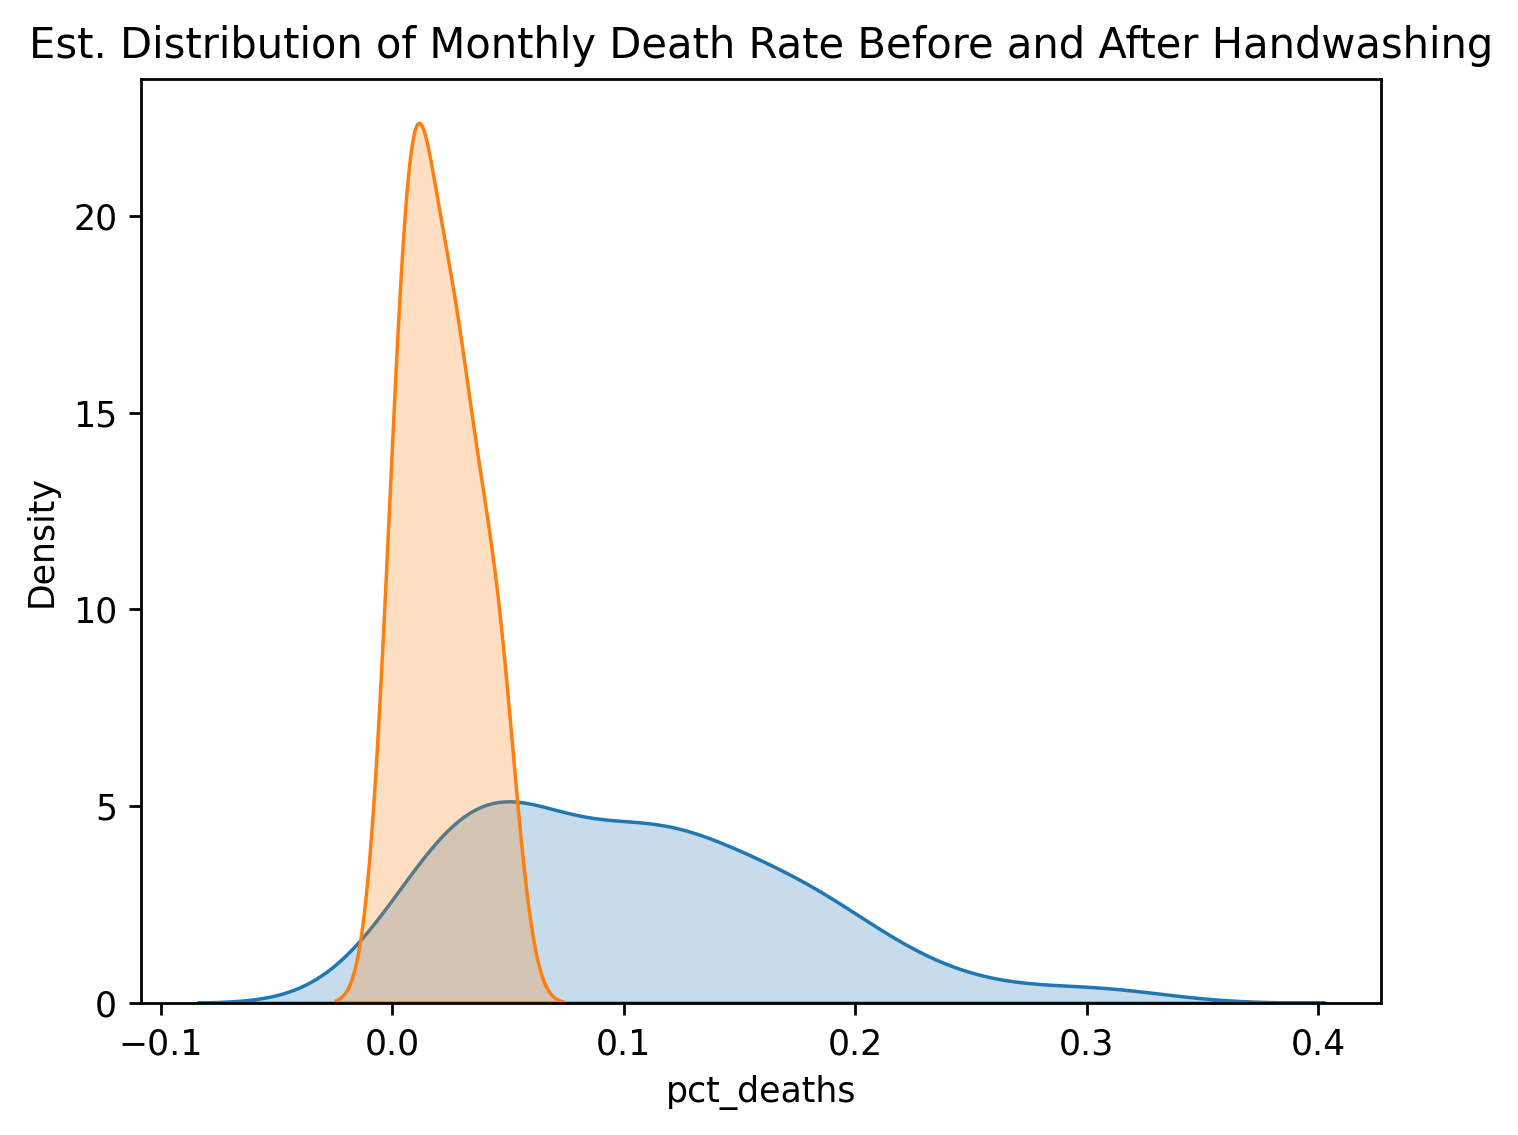

In [31]:
plt.figure(dpi=250)

sns.kdeplot(before_washing["pct_deaths"], fill=True)
sns.kdeplot(after_washing["pct_deaths"], fill=True)
plt.title('Est. Distribution of Monthly Death Rate Before and After Handwashing')

plt.show()

c:\Users\CKL\.vscode\portfolio\handwashing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\CKL\.vscode\portfolio\handwashing\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\CKL\.vscode\portfolio\handwashing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\CKL\.vscode\portfolio\handwashing\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



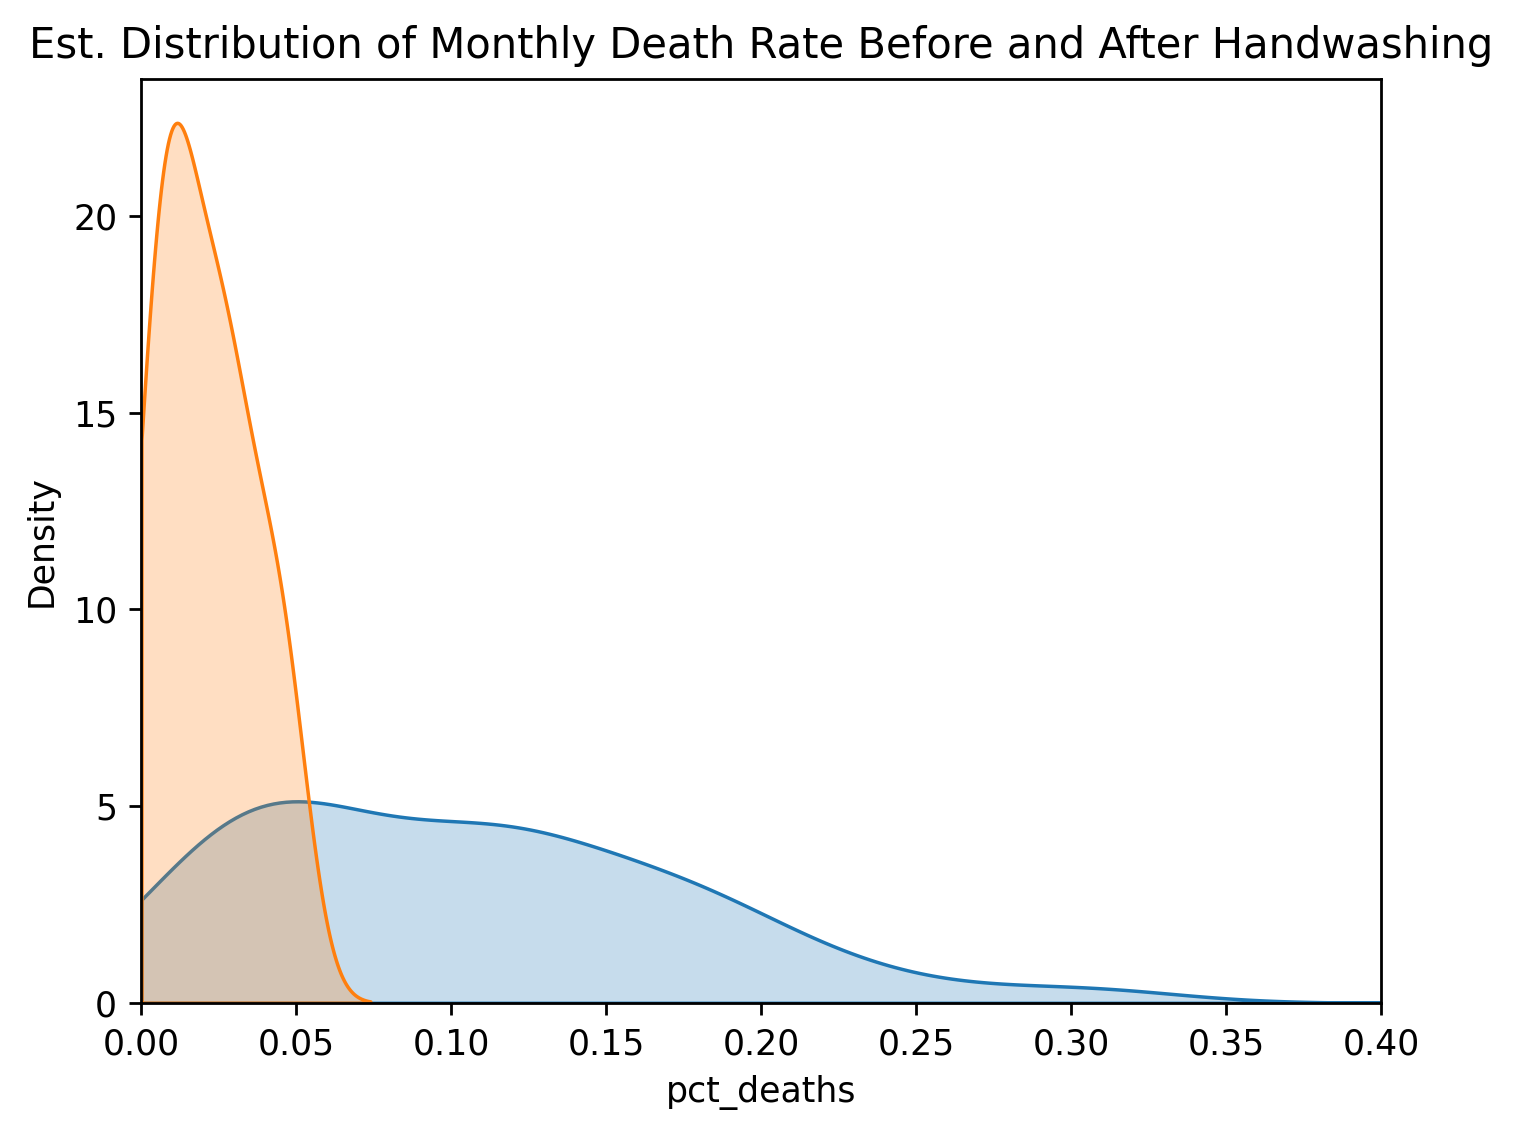

In [32]:
plt.figure(dpi=250)

sns.kdeplot(before_washing.pct_deaths, fill=True, clip=(0, 1))
sns.kdeplot(after_washing.pct_deaths, fill=True, clip=(0, 1))
plt.title("Est. Distribution of Monthly Death Rate Before and After Handwashing")
plt.xlim(0, 0.40)

plt.show()

### Use a T-Test to Show Statistical Significance

**Q**: Use a t-test to determine if the differences in the means are statistically significant or purely due to chance. 

If the p-value is less than 1% then we can be 99% certain that handwashing has made a difference to the average monthly death rate. 

* Import `stats` from scipy
* Use the [`.ttest_ind()` function](https://docs.scipy.org/]doc/scipy/reference/generated/scipy.stats.ttest_ind.html) to calculate the t-statistic and the p-value
* Is the difference in the average proportion of monthly deaths statistically significant at the 99% level? 



In [33]:
t_stat, p_value = stats.ttest_ind(
    a=before_washing["pct_deaths"],
    b=after_washing["pct_deaths"],
)

print(f"p-value is {p_value:.10f}")
print(f"t-stat is {t_stat:.4}")

p-value is 0.0000002985
t-stat is 5.512


In [34]:
# This is beyond my knowledge on statistics, but atleast based on the data,
# handwashing DID have a positive effect on reducing the death rate on childbirth